In [439]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Problem Formulation

## Simulation for idea

### Define object

In [440]:
# Shape
length = 1.0  # m
width = 0.3  # m

# Total Mass
total_mass = 1.0

# Random distribution of the mass each cell
Nx = 4
Ny = 2

cell_mass = np.random.rand(Ny, Nx)
cell_mass = cell_mass / np.sum(cell_mass) * total_mass  # Normalize to 1kg

cell_com_x = np.random.rand(Ny, Nx)  # [0,1]
cell_com_y = np.random.rand(Ny, Nx)  # [0,1]

# Total center of mass
x = np.linspace(-length / 2, length / 2, Nx)
y = np.linspace(-width / 2, width / 2, Ny)
X, Y = np.meshgrid(x, y)

dx = x[1] - x[0]
dy = y[1] - y[0]

global_com_x = X + cell_com_x * dx
global_com_y = Y + cell_com_y * dy

total_mass = np.sum(cell_mass)
com_x = np.sum(global_com_x * cell_mass) / total_mass
com_y = np.sum(global_com_y * cell_mass) / total_mass

print(f"Total COM: ({com_x:.4f}, {com_y:.4f}) m")

Total COM: (0.3835, 0.1818) m


### Define Real Moment of inertia

In [441]:
# local_com_x = np.random.rand(Ny, Nx)
# local_com_y = np.random.rand(Ny, Nx)

In [442]:
# print(f"Total mass: {total_mass:.3f} kg")
# print(f"Center of mass position: ({local_com_x:.3f}, {local_com_y:.3f}) m")
# print(f"Moment of inertia: {I:.5f} kg·m²")

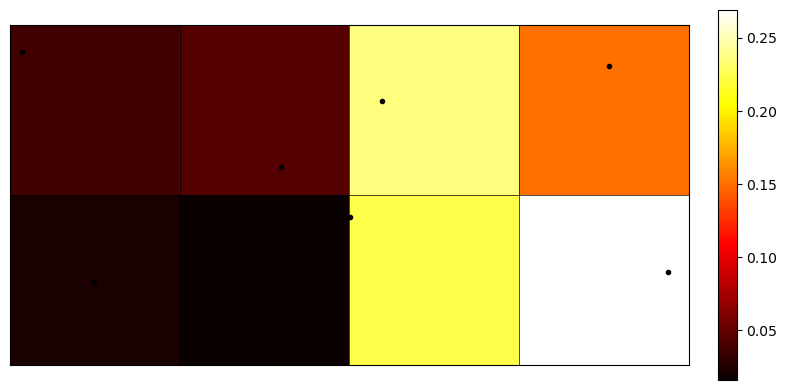

In [443]:
fig, ax = plt.subplots(figsize=(8, 4))

cax = ax.imshow(cell_mass, cmap='hot', origin='lower', extent=[0, Nx, 0, Ny])


for i in range(Ny):
    for j in range(Nx):
        cx = j + cell_com_x[i, j]
        cy = i + cell_com_y[i, j]
        ax.plot(cx, cy, 'ko', markersize=3)


for i in range(Nx + 1):
    ax.axvline(i, color='black', linewidth=0.5)
for j in range(Ny + 1):
    ax.axhline(j, color='black', linewidth=0.5)

ax.set_xticks([])
ax.set_yticks([])

plt.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()


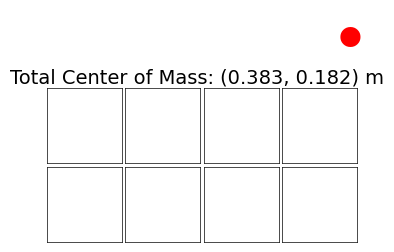

In [444]:
fig, axes = plt.subplots(Ny, Nx, figsize=(Nx, Ny))
plt.subplots_adjust(wspace=0.05, hspace=0.05)

for i in range(Ny):
    for j in range(Nx):
        ax = axes[i, j]
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_facecolor('white')

        for spine in ax.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(0.5)

# Plot global COM in the overall figure
fig.suptitle(f"Total Center of Mass: ({com_x:.3f}, {com_y:.3f}) m", fontsize=14)


# Normalize figure (0~1)
com_fig_x = (com_x + length / 2) / length
com_fig_y = (com_y + width / 2) / width

# Red dot
fig.text(com_fig_x, com_fig_y, '•', color='red', fontsize=50, ha='center', va='center')

plt.show()


### Create simulation Animation

In [445]:
dt = 0.01  
t_max = 10.0  
time = np.arange(0, t_max, dt)

### Define a Impuls Force on the end of the stick

In [446]:
force = np.zeros_like(time)
pulse_duration = 0.1  
force[time < pulse_duration] = 10.0 

lever_arm = length / 2
torque = force * lever_arm
alpha = torque / I 

In [447]:
theta = np.zeros_like(time)  # Angular(radian)
omega = np.zeros_like(time)  # Angular Velocity(radian)

In [448]:
for i in range(1, len(time)):
    omega[i] = omega[i-1] + alpha[i-1] * dt
    theta[i] = theta[i-1] + omega[i-1] * dt

ValueError: x and y must have same first dimension, but have shapes (4,) and (10, 20)

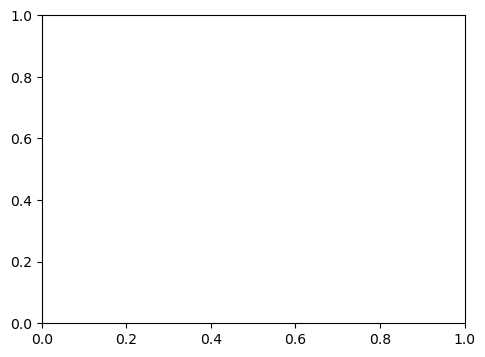

In [449]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(x, mass_density)
plt.title("Mass Distribution along Length")
plt.xlabel("x (m)")
plt.ylabel("Density (kg/m)")

plt.subplot(1, 2, 2)
plt.plot(time, np.rad2deg(theta))
plt.title("Rotation Angle over Time")
plt.xlabel("Time (s)")
plt.ylabel("Angle (degrees)")

plt.tight_layout()
plt.close() # plt.show()

In [ ]:
# Len = length / 2  
# Wid = width / 2 


# center_x = -x_com
# center_y = 0.0

# x_com_pos = center_x + x_com * np.cos(theta)
# y_com_pos = center_y + x_com * np.sin(theta)


# x_com_pos = center_x + x_com * np.cos(theta)
# y_com_pos = center_y + x_com * np.sin(theta)

# fig, ax = plt.subplots()
# ax.set_aspect('equal')
# ax.set_xlim(np.min(x_com_pos) - 0.5, np.max(x_com_pos) + 0.5)
# ax.set_ylim(np.min(y_com_pos) - 0.5, np.max(y_com_pos) + 0.5)

# rod_line, = ax.plot([], [], 'b-', lw=2)
# com_point, = ax.plot([], [], 'ro', ms=6)
# trajectory_line, = ax.plot([], [], 'r--', lw=1)
# time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)


# def init():
#     rod_line.set_data([], [])
#     com_point.set_data([], [])
#     trajectory_line.set_data([], [])
#     time_text.set_text('')
#     return rod_line, com_point, trajectory_line, time_text

# def update(i):
#     theta_i = theta[i]
#     cos_theta = np.cos(theta_i)
#     sin_theta = np.sin(theta_i)

    
#     x0 = center_x - Len * cos_theta
#     y0 = center_y - Len * sin_theta
#     x1 = center_x + Len * cos_theta
#     y1 = center_y + Len * sin_theta
#     rod_line.set_data([x0, x1], [y0, y1])

   
#     com_x = center_x + x_com * cos_theta
#     com_y = center_y + x_com * sin_theta
#     com_point.set_data([com_x], [com_y])


   
#     trajectory_line.set_data(x_com_pos[:i], y_com_pos[:i])

#     time_text.set_text(f"t = {time[i]:.2f}s")
#     return rod_line, com_point, trajectory_line, time_text

# ani = FuncAnimation(fig, update, frames=len(time), init_func=init, interval=30, blit=True)
# plt.close(fig)
# HTML(ani.to_jshtml())

In [ ]:
# print(f"Total mass: {total_mass:.3f} kg")
# print(f"Center of mass position: {x_com:.3f} m")
# print(f"Moment of inertia: {I:.5f} kg·m²")
# print(f"Applied torque: {torque:.2f} N·m")
# print(f"Angular acceleration: {alpha:.2f} rad/s²")